In [1]:
library(brms) #predictability: Double hierearchical model
library(MCMCglmm) #HPDinterval
library(dplyr) #%>%
library(lmerTest) #lmer
#library(MuMIn) #r2
#library(merTools) #sim

Warning message:
"le package 'brms' a été compilé avec la version R 4.1.2"
Le chargement a nécessité le package : Rcpp

Warning message:
"le package 'Rcpp' a été compilé avec la version R 4.1.2"
Loading 'brms' package (version 2.16.3). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attachement du package : 'brms'


L'objet suivant est masqué depuis 'package:stats':

    ar


Warning message:
"le package 'MCMCglmm' a été compilé avec la version R 4.1.2"
Le chargement a nécessité le package : Matrix

Warning message:
"le package 'Matrix' a été compilé avec la version R 4.1.2"
Le chargement a nécessité le package : coda

Warning message:
"le package 'coda' a été compilé avec la version R 4.1.2"
Le chargement a nécessité le package : ape

Warning message:
"le package 'ape' a été compilé avec la version R 4.1.2"

Attachement du package : 'MCMCglmm'


L'objet suivant est masqué depuis 'pac

In [2]:
library(parallel)
my.cores = detectCores()-1 #minus 1 to avoid bocking the computer
my.cores

[1] 11

In [3]:
#df[rowSums(is.na(df)) > 0,]

# Behaviorual syndrome

,TRAN
OFH,0
TRAN,1


,OFH
TRAN,0
OFH,1


,MEXP,NewAfterEpi,REXP
LEXP,0,0,0
MEXP,1,0,0
NewAfterEpi,0,1,0
REXP,0,0,1


,MEXP,NewAfterEpi,REXP
LEXP,0,0,0
MEXP,1,0,0
NewAfterEpi,0,1,0
REXP,0,0,1


[1] 4811   31


 TrackingSystemID          level           DOA             DIB       
 Length:4811        2021-01-17: 156   Min.   :179.0   Min.   : 61.0  
 Class :character   2021-04-18: 156   1st Qu.:216.0   1st Qu.: 98.0  
 Mode  :character   2021-01-24: 155   Median :284.0   Median :166.0  
                    2021-05-07: 155   Mean   :285.4   Mean   :167.4  
                    2021-05-23: 155   3rd Qu.:340.0   3rd Qu.:222.0  
                    2021-01-05: 154   Max.   :410.0   Max.   :292.0  
                    (Other)   :3880                                  
         FoodPenID      BS_type          Treatment           CLASS     
 FoodPenID1-4 :1144   Length:4811        TRAN:2413   LEXP       : 866  
 FoodPenID5-8 :1206   Class :character   OFH :2398   MEXP       :1104  
 FoodPenID9-12:2461   Mode  :character               NewAfterEpi:1480  
                                                     REXP       :1361  
                                                                       
        

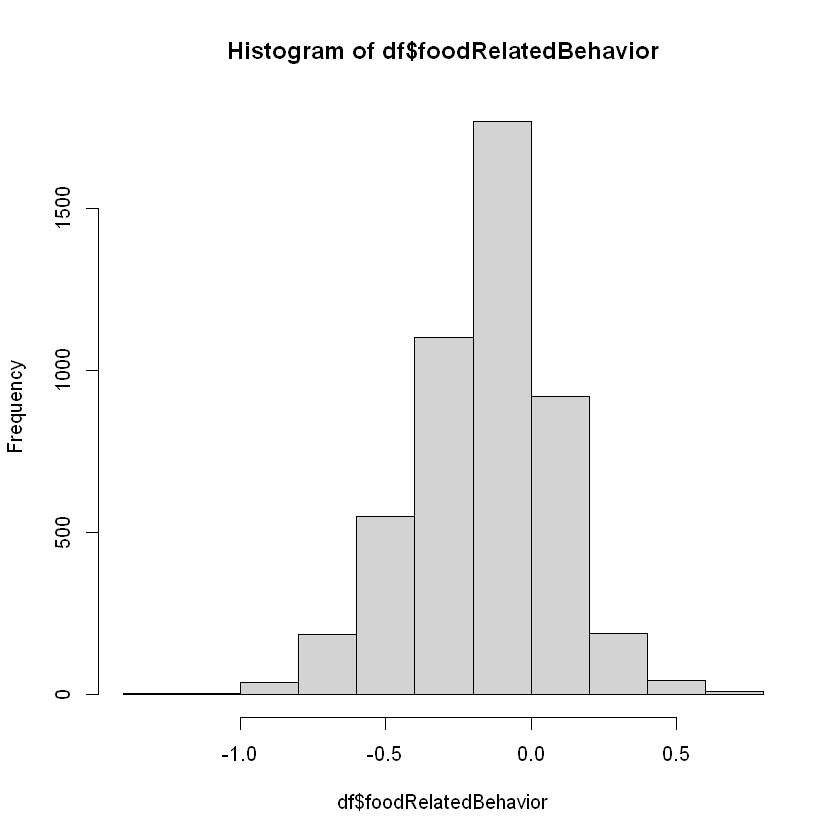

[1] 4811   45

[1] 3143   45

[1] 457  45

[1] 444  45

[1] 307  45

[1] 460  45

[1] 603  45

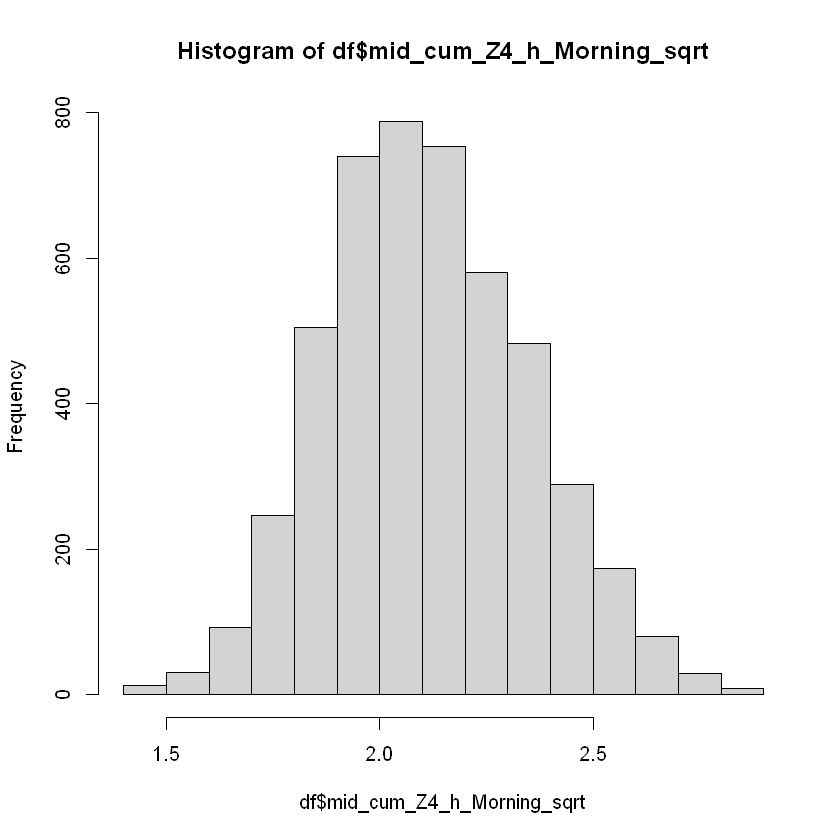

In [4]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/ALLDATA_'
#df = read.csv(file.path(path_,'df_daily_aggregatedHA.csv'), header = TRUE, sep = ",")
df = read.csv(file.path(path_,'df_BS.csv'), header = TRUE, sep = ",")

df$HenID = as.factor(df$HenID)   
df$PenID = as.factor(df$PenID)
df$level = as.factor(df$level) 
df$FoodPenID = as.factor(df$FoodPenID) 

#df$WOA_F = as.factor(df$WOA) 

df$CLASS = as.factor(df$CLASS) 
df$Treatment = as.factor(df$Treatment)

#scale: mean-centering of the environmental variable so that intercepts reflect average values for the HenID and ind. 
#df$temperature_C_avg_scale = scale(df$temperature_C_avg, center=TRUE, scale=TRUE)

#setting reference group
contrasts(df$Treatment)
df <- df %>% mutate(Treatment = relevel(Treatment, ref = "TRAN"))
contrasts(df$Treatment)

contrasts(df$CLASS)
df <- df %>% mutate(CLASS = relevel(CLASS, ref = "LEXP"))
contrasts(df$CLASS)
print(dim(df))
summary(df)

df$latency_1_Zone_mn_6hOPP = max(df$latency_1_Zone_mn_6h)-df$latency_1_Zone_mn_6h
df$food_related_behavior_final_inv_cst = (-1)*(df$food_related_behavior_final)+1.01
df$latency_1_Zone_15mn_6h = as.integer(df$latency_1_Zone_mn_6h/15)
df$latency_1_Zone_15mn_6hOPP = max(df$latency_1_Zone_15mn_6h) - df$latency_1_Zone_15mn_6h

df$latency_1_Zone_15mn_3h = as.integer(df$latency_1_Zone_mn_3h/15)
df$latency_1_Zone_15mn_3hOPP = max(df$latency_1_Zone_15mn_3h) - df$latency_1_Zone_15mn_3h
df$latency_1_Zone_15mn_3h_bind = with(df, cbind(latency_1_Zone_15mn_3h, latency_1_Zone_15mn_3hOPP))
df$size = with(df, latency_1_Zone_15mn_3h + latency_1_Zone_15mn_3hOPP)

#Parameter names should not contain dots or underscores. & easier reading
df$VTD = df$vertical_travel_distance_fulllight_perinsideh
df$KBFInterp = df$KBF_interp
df$weightInterp = df$weight_interp
df$SleepingNotUppest = df$Sleeping_NotUppest
df$foodRelatedBehavior = log(df$food_related_behavior_final_inv_cst)
hist(df$foodRelatedBehavior)
df$mid_cum_Z4_h_Morning_sqrt = sqrt(df$mid_cum_Z4_h_Morning)
hist(df$mid_cum_Z4_h_Morning_sqrt)

dim(df)
df_time = df[df$BS_type=='time',]
dim(df_time)

df_LP2 = df[df$BS_type=='LP2',]
dim(df_LP2)

df_LP10 = df[df$BS_type=='LP10',]
dim(df_LP10)

df_cold = df[df$BS_type=='cold',]
dim(df_cold)

df_vacc = df[df$BS_type=='TypicalVaccinationDay',]
dim(df_vacc)

df_AC = df[df$across_context==1,]
dim(df_AC)

df_alltime = df[df$BS_type %in% c('LP2','time','LP10'),]

In [5]:
head(df_time,3)

,TrackingSystemID,level,DOA,DIB,FoodPenID,BS_type,Treatment,CLASS,PenID,temperature_C_avg,...,latency_1_Zone_15mn_3h,latency_1_Zone_15mn_3hOPP,latency_1_Zone_15mn_3h_bind,size,VTD,KBFInterp,weightInterp,SleepingNotUppest,foodRelatedBehavior,mid_cum_Z4_h_Morning_sqrt
,<chr>,<fct>,<int>,<int>,<fct>,<chr>,<fct>,<fct>,<fct>,<dbl>,...,<int>,<int>,"<int[,2]>",<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
4,TrackingSystem 10-12,2020-12-20,200,82,FoodPenID9-12,time,TRAN,REXP,pen10,5.5000000,...,12,0,"12, 0",12,5.288128,0.000000,1802.650,0,-0.5363137,2.141715
7,TrackingSystem 10-12,2021-01-03,214,96,FoodPenID9-12,time,TRAN,REXP,pen10,0.8333333,...,9,3,"9, 3",12,7.312166,0.000000,1839.283,0,-0.2227852,1.971181
9,TrackingSystem 10-12,2021-01-17,228,110,FoodPenID9-12,time,TRAN,REXP,pen10,1.8333333,...,12,0,"12, 0",12,6.392746,5.571429,1850.211,0,-0.3149193,2.296193


# VTD

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = log 
Formula: vertical_travel_distance_fulllight_perinsideh ~ Treatment + scale(weightInterp) + scale(KBFInterp) + scale(DIB) + scale(I(DIB^2)) + (1 | a | HenID) 
         sigma ~ scale(weightInterp) + scale(KBFInterp) + (1 | a | HenID)
   Data: df_alltime (Number of observations: 4044) 
  Draws: 3 chains, each with iter = 5000; warmup = 3500; thin = 2;
         total post-warmup draws = 2250

Group-Level Effects: 
~HenID (Number of levels: 190) 
                               Estimate Est.Error l-95% CI u-95% CI Rhat
sd(Intercept)                      1.41      0.08     1.27     1.57 1.00
sd(sigma_Intercept)                0.32      0.02     0.28     0.37 1.00
cor(Intercept,sigma_Intercept)     0.60      0.06     0.48     0.71 1.00
                               Bulk_ESS Tail_ESS
sd(Intercept)                       536     1099
sd(sigma_Intercept)                1780     2920
cor(Intercept,sigma_Intercept)     1521     2597

Populatio

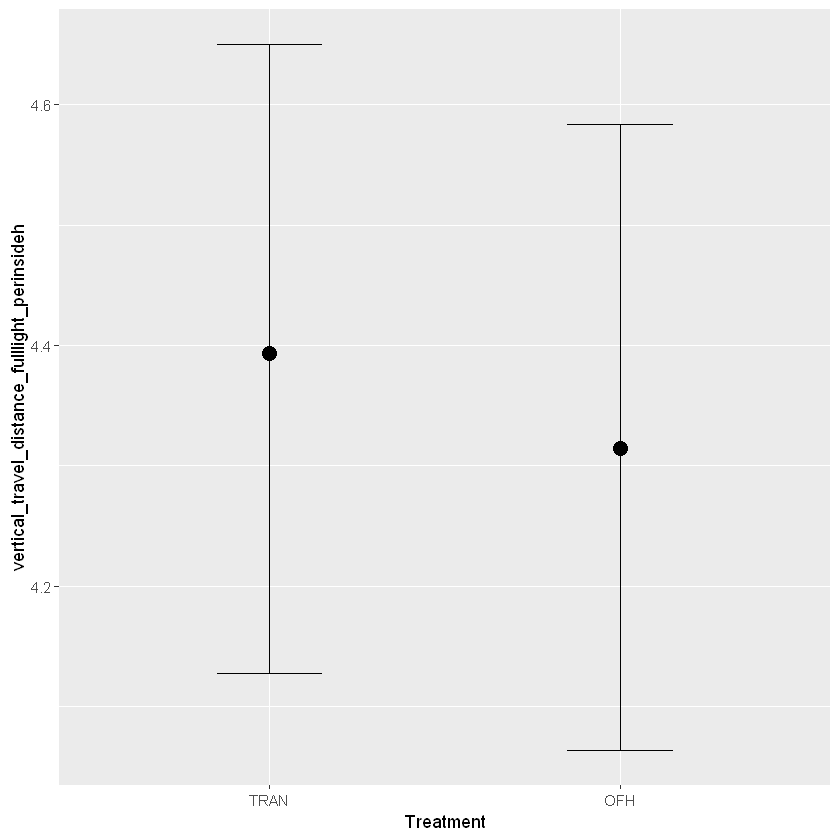

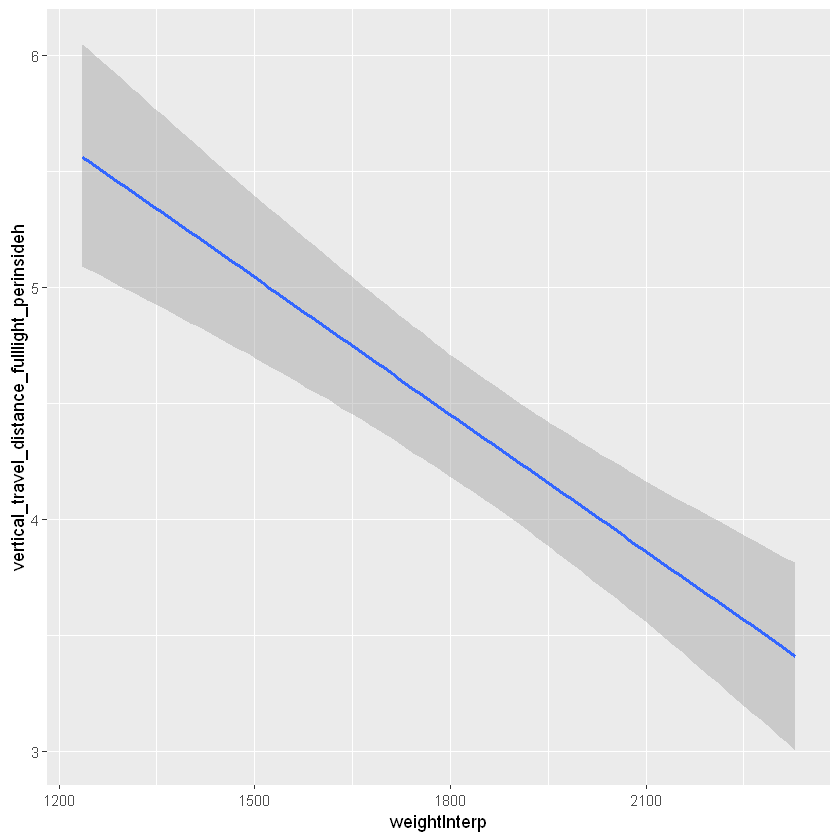

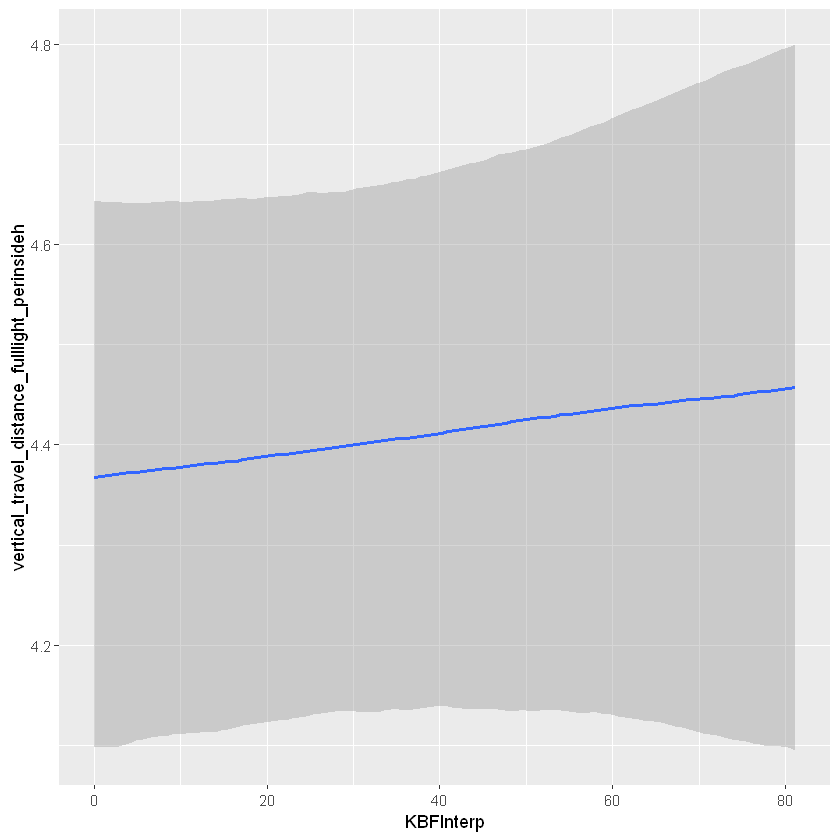

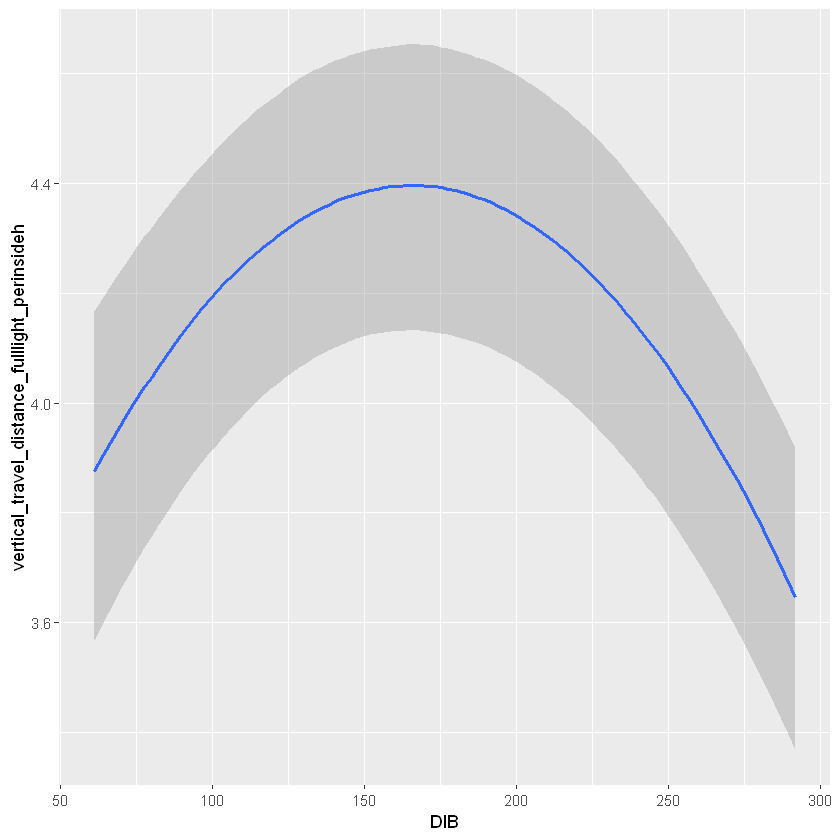

In [6]:
#such a correlation can give insights whether certain behavioral types are particularlypredictable or un-predictable in their behavior
double_model_cor = bf(vertical_travel_distance_fulllight_perinsideh ~ Treatment + scale(weightInterp)+scale(KBFInterp)+scale(DIB)+scale(I(DIB^2)) +(1|a|HenID),
                      sigma ~  scale(weightInterp)+scale(KBFInterp) + (1|a|HenID))
mod_VTD = brm(double_model_cor, data = df_alltime, warmup = 7000,iter = 10000, thin=2, chains = 3,inits  = "random",
                 seed = 12345, cores = my.cores)
summary(mod_VTD)

save(mod_VTD, file = "mod_VTD.rda")
#load("Multi_DHGLM_allvar.rda") #do not put modelreload = load("Multi_DHGLM_allvar.rda")

#Conditional Effects of Predictors
#https://rdrr.io/cran/brms/man/conditional_effects.brmsfit.html
conditional_effects(mod_VTD)

Warning message:
"
113 (2.8%) p_waic estimates greater than 0.4. We recommend trying loo instead."
Warning message:
"Found 16 observations with a pareto_k > 0.7 in model 'mod_VTD'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. "



Computed from 4500 by 4044 log-likelihood matrix

          Estimate    SE
elpd_waic  -5483.2  53.9
p_waic       310.7  11.6
waic       10966.3 107.7

113 (2.8%) p_waic estimates greater than 0.4. We recommend trying loo instead. 

Computed from 4500 by 4044 log-likelihood matrix

         Estimate    SE
elpd_loo  -5492.2  54.6
p_loo       319.7  12.9
looic     10984.4 109.2
------
Monte Carlo SE of elpd_loo is NA.

Pareto k diagnostic values:
                         Count Pct.    Min. n_eff
(-Inf, 0.5]   (good)     4004  99.0%   589       
 (0.5, 0.7]   (ok)         24   0.6%   114       
   (0.7, 1]   (bad)        14   0.3%   45        
   (1, Inf)   (very bad)    2   0.0%   3         
See help('pareto-k-diagnostic') for details.


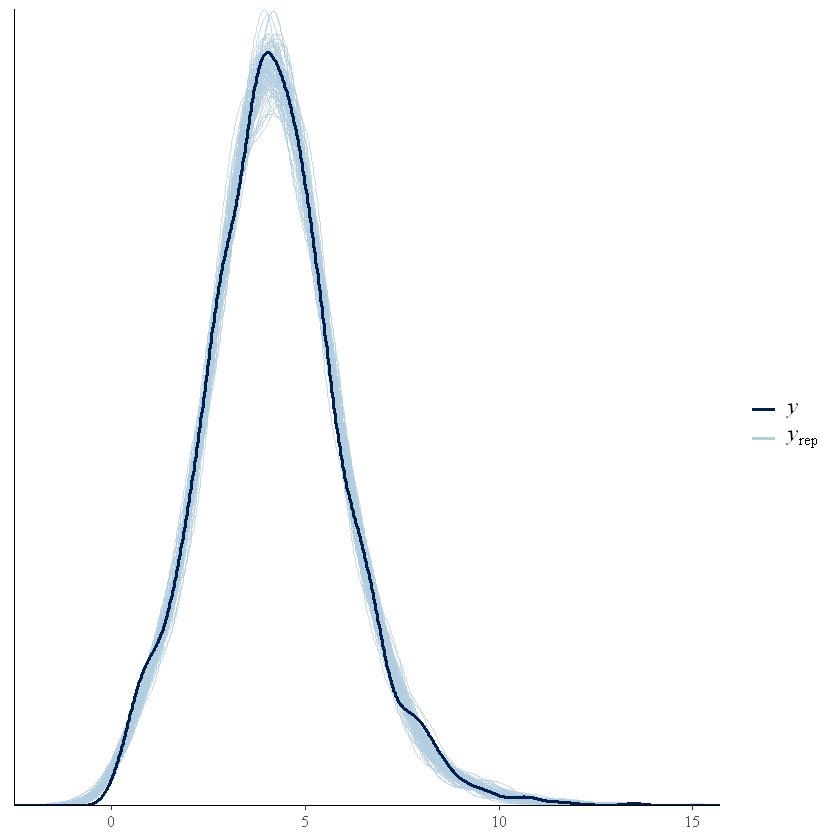

In [7]:
#check model fitting
mod_VTD = add_criterion(mod_VTD, criterion=c('waic','loo'), file=file.path(path_,'mod_VTD'))
print(mod_VTD$criteria$waic)
#approximative leave-one-out cross validation
print(mod_VTD$criteria$loo)

#posterior predictive check
pp_check(mod_VTD,ndraws = 100)
#-->we don't see any major systematic discrepancies of our data from what can be predicted with modelPred

# foodRelatedBehavior

In [ ]:
#such a correlation can give insights whether certain behavioral types are particularlypredictable or un-predictable in their behavior
double_model_cor = bf(scale(foodRelatedBehavior) ~ Treatment + FoodPenID + scale(weightInterp) + scale(KBFInterp) + scale(DIB) +(1|a|HenID),
                      sigma~Treatment + FoodPenID + scale(weightInterp) + scale(KBFInterp) + scale(DIB) +(1|a|HenID))
mod_food = brm(double_model_cor, data = df_alltime, warmup = 7000,iter = 10000, thin=2, chains = 3,inits  = "random",
                 seed = 12345, cores=my.cores)
summary(mod_food)



save(mod_food, file = "mod_food.rda")
#load("Multi_DHGLM_allvar.rda") #do not put modelreload = load("Multi_DHGLM_allvar.rda")

#Conditional Effects of Predictors
#https://rdrr.io/cran/brms/man/conditional_effects.brmsfit.html
conditional_effects(mod_food)